Dataset columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

Sample Data:
                                                 Product  \
29904  Credit reporting, credit repair services, or o...   
30629  Credit reporting, credit repair services, or o...   
30735  Credit reporting, credit repair services, or o...   
30795  Credit reporting, credit repair services, or o...   
30807  Credit reporting, credit repair services, or o...   

                            Consumer complaint narrative  
29904  The Summer of XX/XX/2018 I was denied a mortga...  
30629  There are many mistakes appear in my report wi...  
30735  There are many mistakes appear in my report wi...  
30795  There are many mistakes appear in my re

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Accuracy: 72.64%

Classification Report:
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.55      0.58      0.56      2977
                                                 Checking or savings account       0.59      0.54      0.56      2576
                                                               Consumer Loan       0.52      0.39      0.45      1895
                                                                 Credit card       0.56      0.52      0.54      3768
                                                 Credit card or prepaid card       0.58      0.57      0.57      4276
                                                            Credit reporting       0.63      0.39      0.48      6318
Credit reporting, credit repair services, or other personal consumer reports       0.70      0.79      0.74     18476
       

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


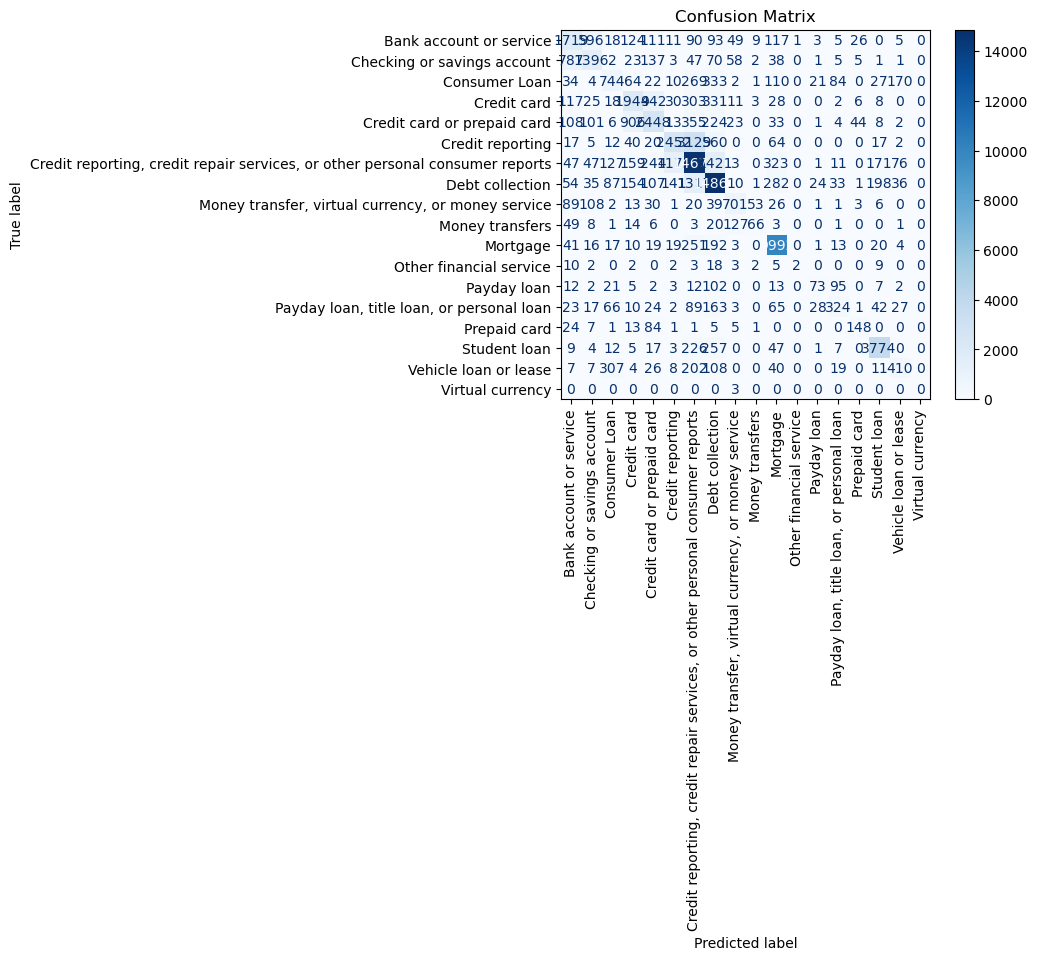

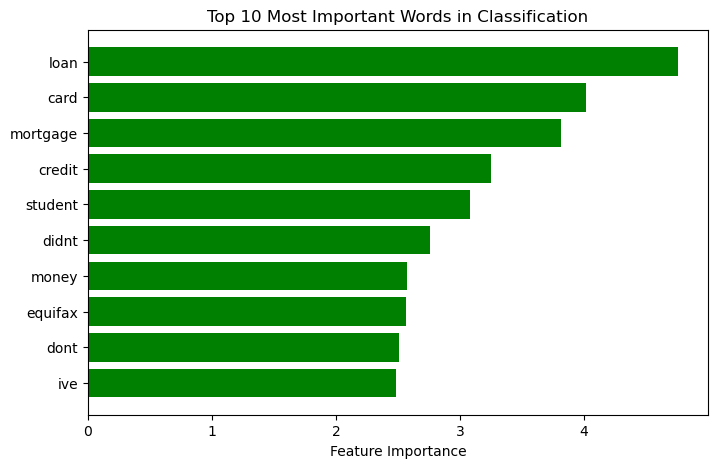


--- Sample Predictions ---
Complaint: The bank closed my account without any reason.
Predicted Product: Checking or savings account

Complaint: Debt collectors are calling me repeatedly about a loan I don't owe.
Predicted Product: Debt collection

Complaint: My mortgage payment was not processed on time.
Predicted Product: Mortgage

Complaint: My credit card was charged twice by mistake.
Predicted Product: Credit card



In [3]:
# =======================
# 1. Import Dependencies
# =======================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# =======================
# 2. Load Dataset
# =======================
path = "/kaggle/input/consumer-complaint-database/rows.csv"  # Change this path if needed
df = pd.read_csv(path, low_memory=False)

# Display the available columns
print("Dataset columns:", df.columns.tolist())

df = df[['Product', 'Consumer complaint narrative']].dropna()

print("\nSample Data:")
print(df.head())

# =======================
# 3. Preprocessing
# =======================

# ✅ Manual stopword list (no download needed)
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs',
    'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
    'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
    'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
    'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should',
    'now'
}

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['Consumer complaint narrative'].apply(clean_text)

# =======================
# 4. Encode Labels
# =======================
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['Product'])

print("\nUnique Categories:", le.classes_)

# =======================
# 5. Split Data
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# =======================
# 6. Vectorize Text
# =======================
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# =======================
# 7. Train Model
# =======================
model = LogisticRegression(max_iter=300)
model.fit(X_train_vec, y_train)

# =======================
# 8. Evaluate Model
# =======================
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# =======================
# 9. Feature Importance
# =======================
importance = np.abs(model.coef_).mean(axis=0)
indices = np.argsort(importance)[-10:]
features = np.array(vectorizer.get_feature_names_out())[indices]

plt.figure(figsize=(8,5))
plt.barh(features, importance[indices], color='green')
plt.title("Top 10 Most Important Words in Classification")
plt.xlabel("Feature Importance")
plt.show()

# =======================
# 10. User Input Prediction (Optional)
# =======================
# Commented out to avoid input() errors
# print("\n--- User Input Mode ---")
# user_input = input("Enter a consumer complaint description: ")
# user_cleaned = clean_text(user_input)
# user_vec = vectorizer.transform([user_cleaned])
# prediction = model.predict(user_vec)
# predicted_category = le.inverse_transform(prediction)[0]
# print(f"\nPredicted Product Category: {predicted_category}")

# =======================
# 11. Sample Predictions
# =======================
sample_texts = [
    "The bank closed my account without any reason.",
    "Debt collectors are calling me repeatedly about a loan I don't owe.",
    "My mortgage payment was not processed on time.",
    "My credit card was charged twice by mistake."
]

print("\n--- Sample Predictions ---")
for text in sample_texts:
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = le.inverse_transform(model.predict(vec))[0]
    print(f"Complaint: {text}\nPredicted Product: {pred}\n")


In [5]:
# =======================
# 10. User Input Prediction
# =======================
print("\n--- User Input Mode ---")
user_input = input("Enter a consumer complaint description: ")

user_cleaned = clean_text(user_input)
user_vec = vectorizer.transform([user_cleaned])
prediction = model.predict(user_vec)
predicted_category = le.inverse_transform(prediction)[0]

print(f"\nPredicted Product Category: {predicted_category}")



--- User Input Mode ---


Enter a consumer complaint description:  i forget my credit card pin



Predicted Product Category: Credit card or prepaid card
